In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from PIL import Image
from skimage.morphology import watershed, label
from skimage.feature import peak_local_max
from skimage.segmentation import random_walker

In [4]:
def sample_image():
    # Generate an initial image with two overlapping circles
    x, y = np.indices((80, 80))
    x1, y1, x2, y2 = 28, 28, 44, 52
    r1, r2 = 16, 20
    mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
    mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
    image = np.logical_or(mask_circle1, mask_circle2)
    
    return image

In [5]:
def matrix(img, comment):
    print('--- {} ---'.format(comment))
    print('shape:', img.shape, 'dtype:', img.dtype, 'min:', img.min(), 'mean:', img.mean(), 'max:', img.max())
    print('')
    
def vis(img, comment, gray=False):
    print('--- {} ---'.format(comment))
    plt.figure(figsize=(10, 10), dpi=200)
    if gray: plt.gray()
    plt.imshow(img)
    plt.show()

In [6]:
def sep_obj2(image):
    distance = ndimage.distance_transform_edt(image)
    local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((70, 70)), labels=image)
    markers = label(local_maxi)
    labels_ws = watershed(-distance, markers, mask=image)
    
    return labels_ws

In [32]:
def sep_obj(image):
    # Argument image should be boolean image
    # Now we want to separate the two objects in image
    # Generate the markers as local maxima of the distance
    # to the background

    matrix(image, 'image')
    distance = ndimage.distance_transform_edt(image)
#     vis(distance, 'distance')
    local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((100, 100)), labels=image)
#     vis(local_maxi, 'local_maxi')
    markers = label(local_maxi)
    # labels_ws = watershed(-distance, markers, mask=image)
    markers[~image] = -1
#     vis(markers, 'markers')
    labels_rw = random_walker(image, markers)
    
    return labels_rw, distance

--- img ---


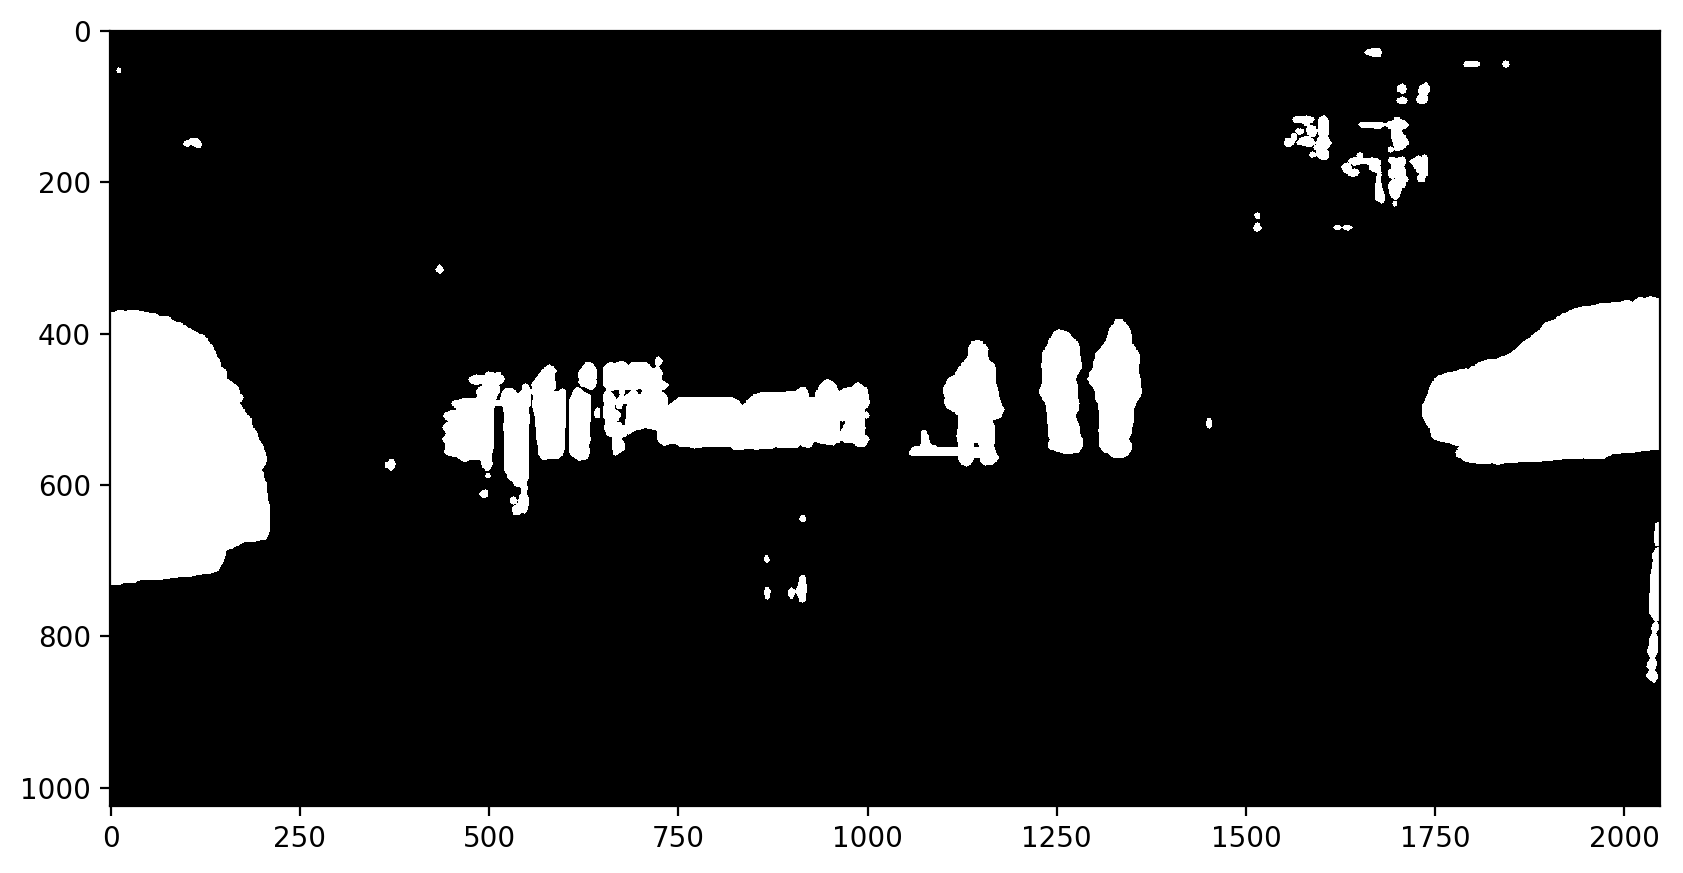

--- image ---
shape: (1024, 2048) dtype: bool min: False mean: 0.09253549575805664 max: True

--- distance ---
shape: (1024, 2048) dtype: float64 min: 0.0 mean: 3.159430393383219 max: 179.38784797192923

--- distance ---


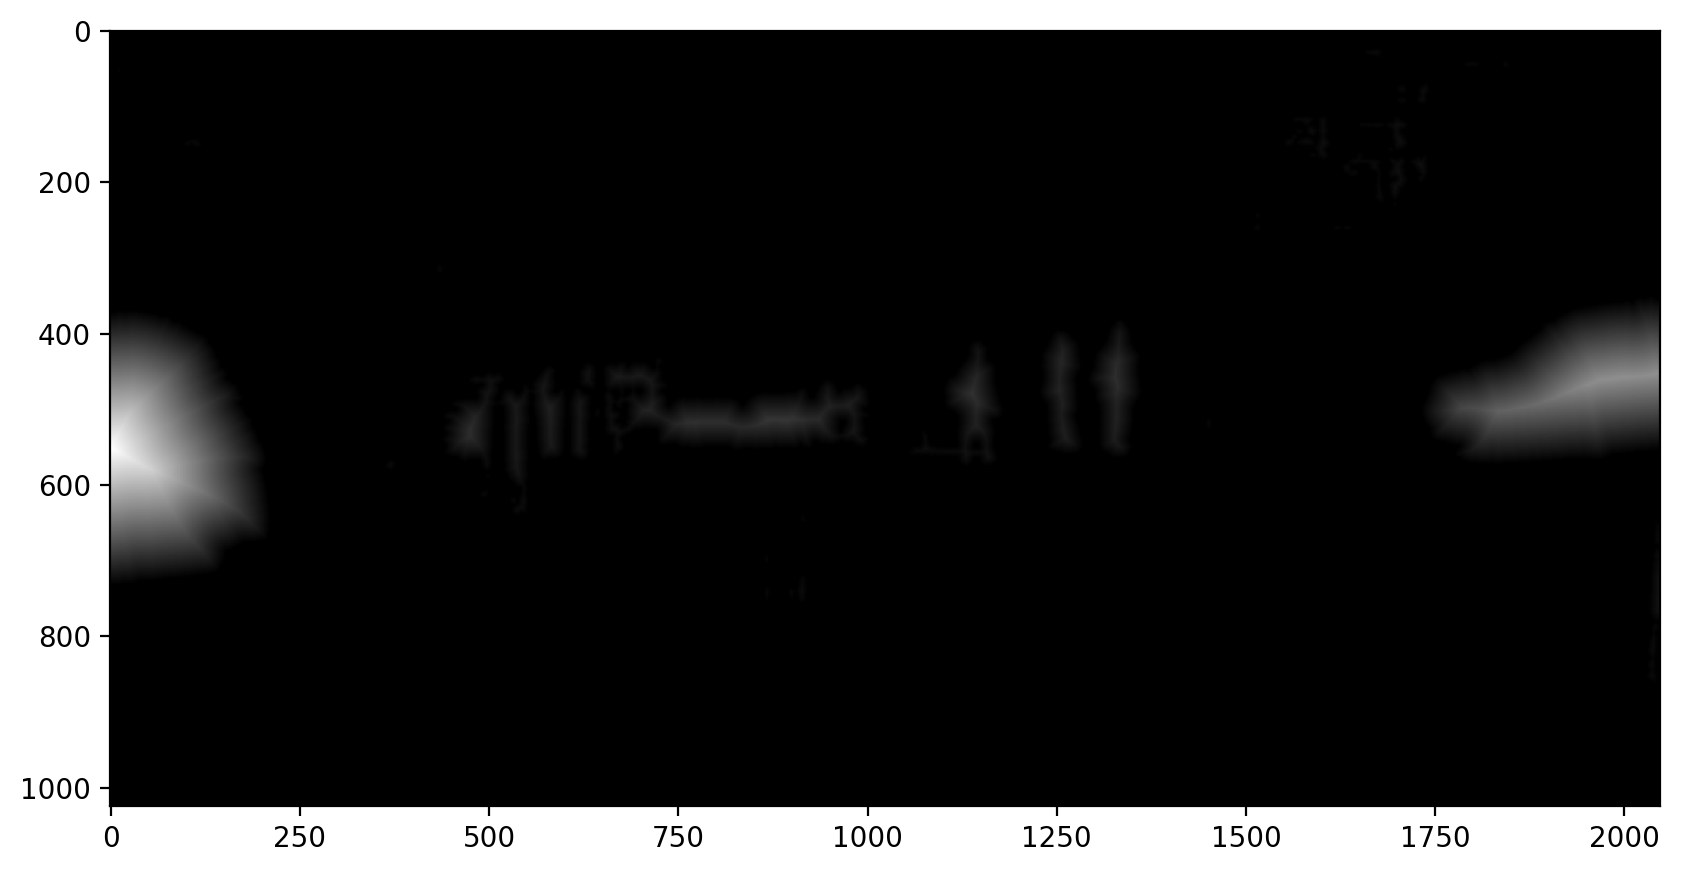

In [33]:
img = Image.open('../data/exp/cityscapes_testset/ckpt/ex_04_mask.png')
# img = img.resize((int(img.width / 2), int(img.height / 2)))
vis(img, 'img', gray=True)
mat = np.array(img).astype(np.bool)
# separeted = sep_obj(mat)
separated, distance = sep_obj(mat)
# matrix(separated, 'separated')
# vis(separated, 'separeted')
matrix(distance, 'distance')
vis(distance, 'distance', gray=True)

--- new_mask ---


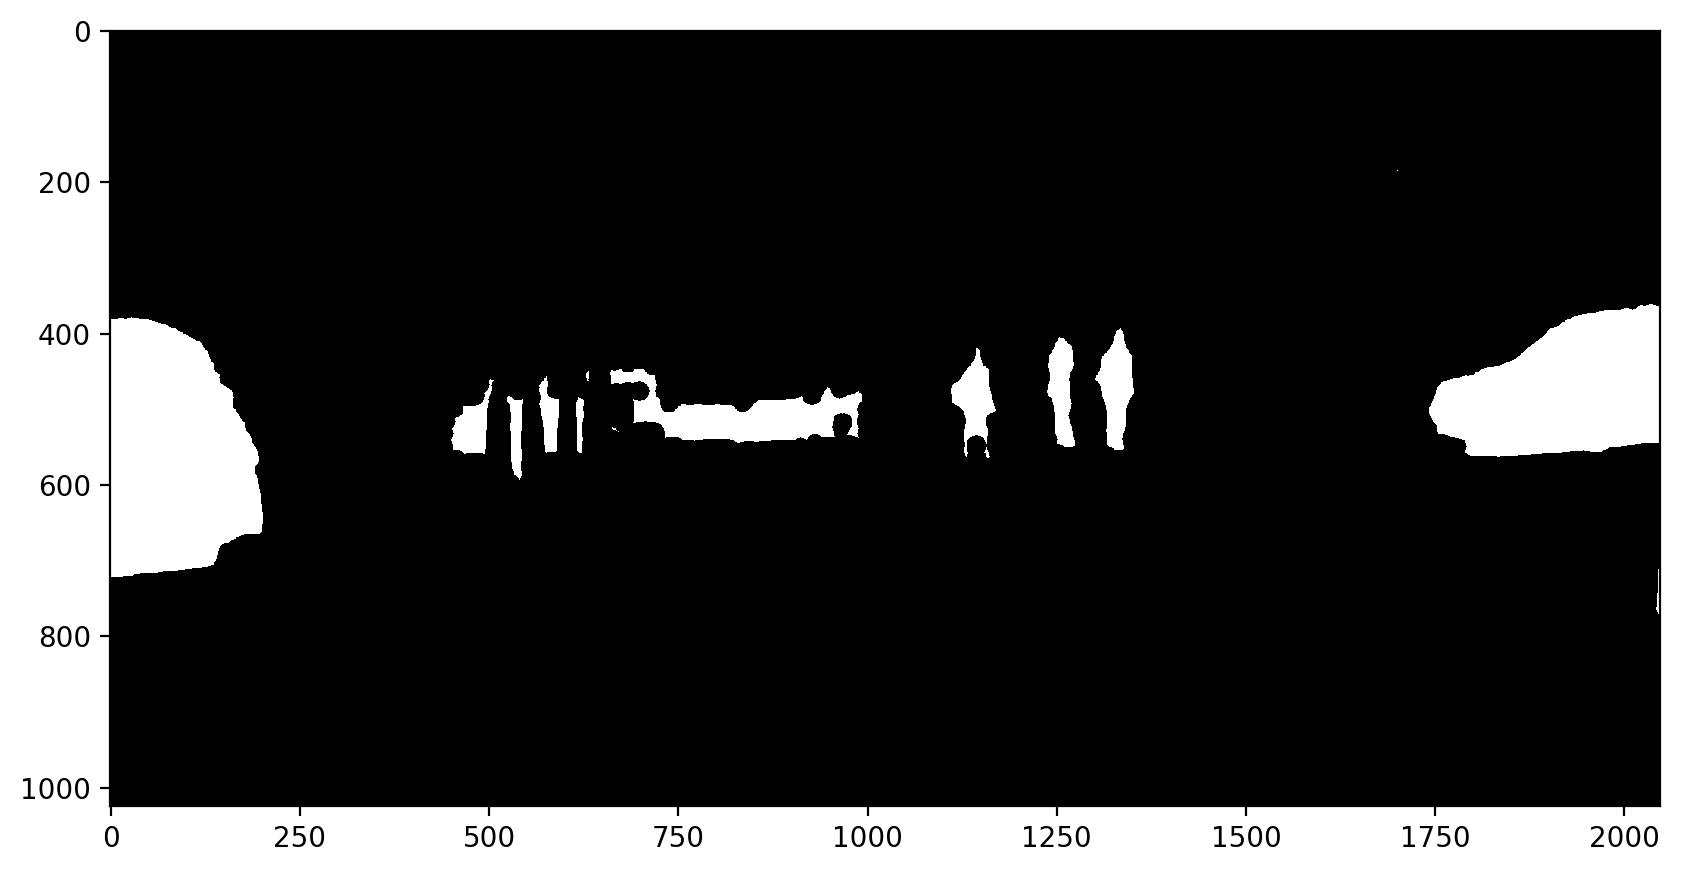

--- difference ---


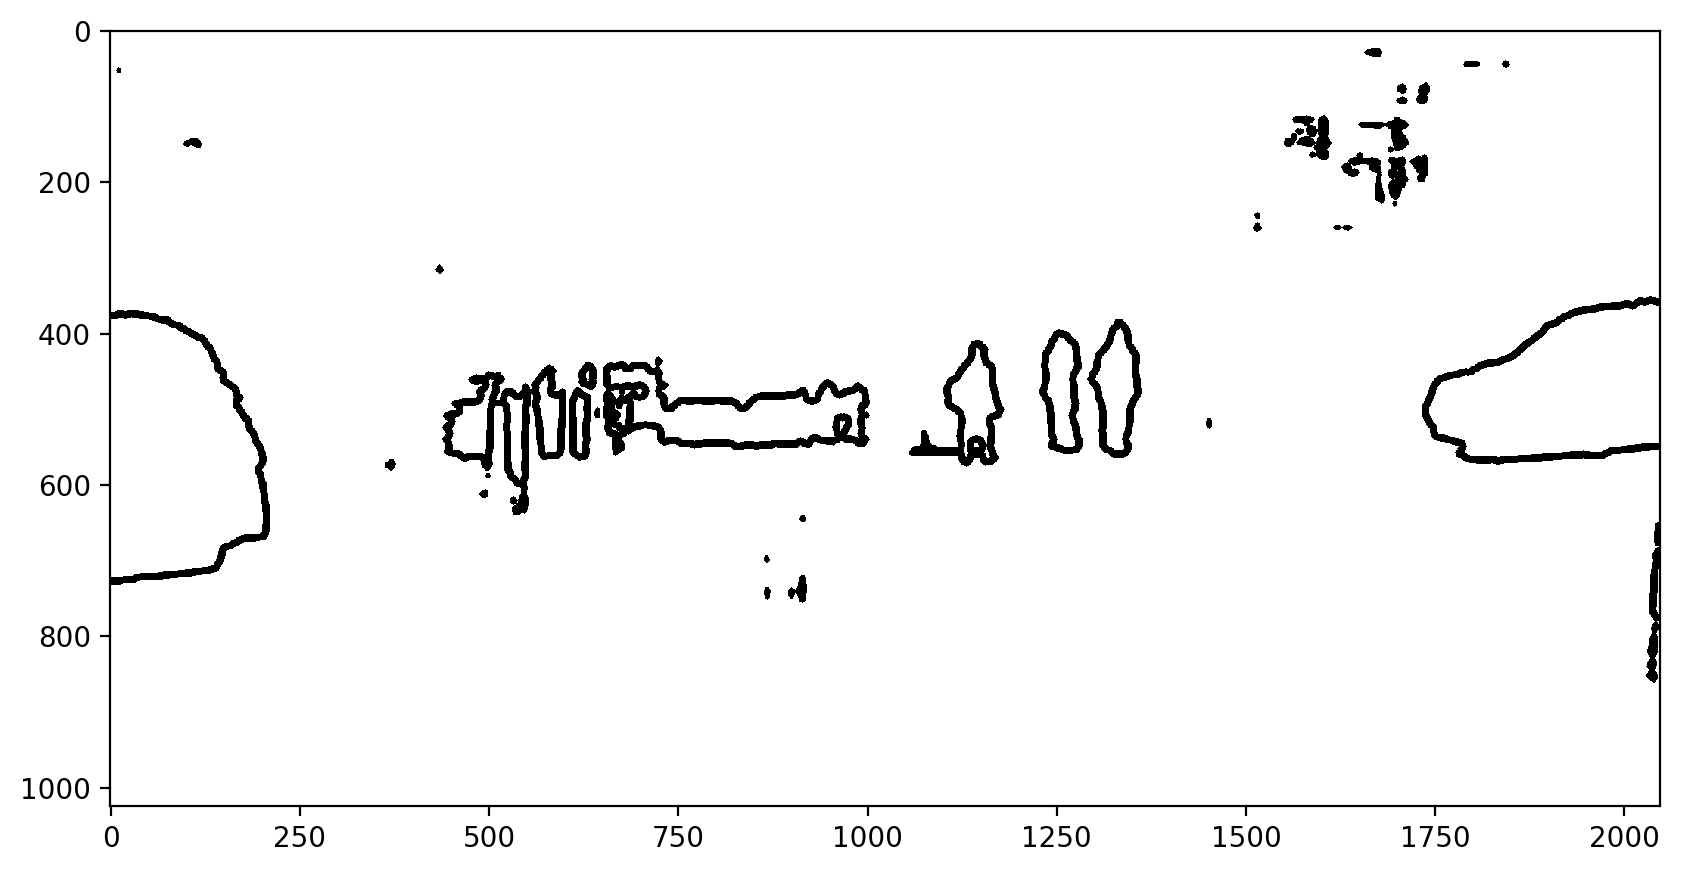

In [35]:
new_mask = np.where(distance > 10, 1, 0)
vis(new_mask, 'new_mask', gray=True)
vis(new_mask - mat, 'difference')

In [17]:
separated_img = Image.fromarray(separated)